In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import glob
import os

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10, 10]

import utils
from add_fourier import get_fourier_fn

In [3]:
def read_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame.from_dict(data['data'])
    df.sort_values('lon', inplace=True)
#     df = df[df.obs_to_target < 6.0E7]
    return df

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


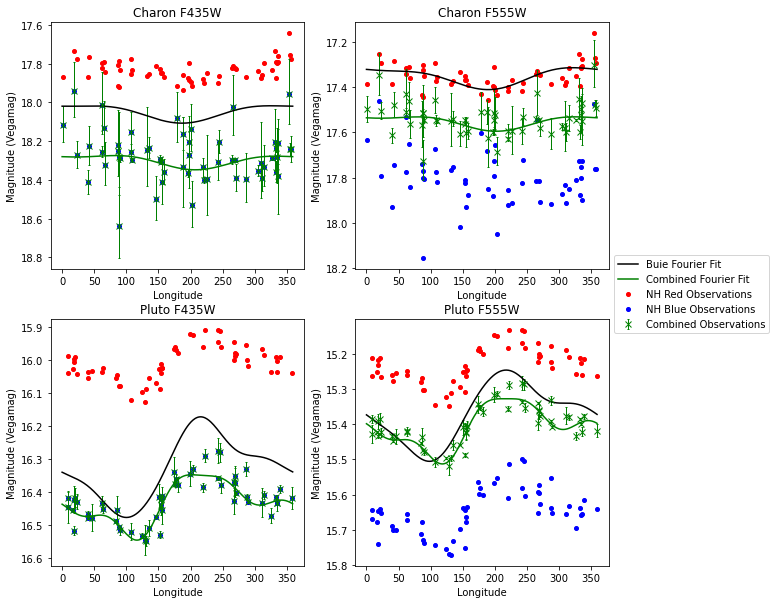

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


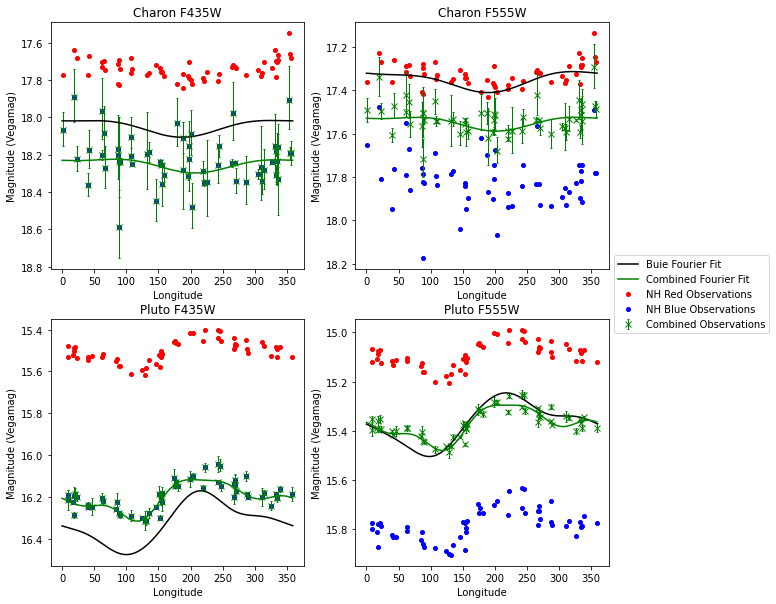

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


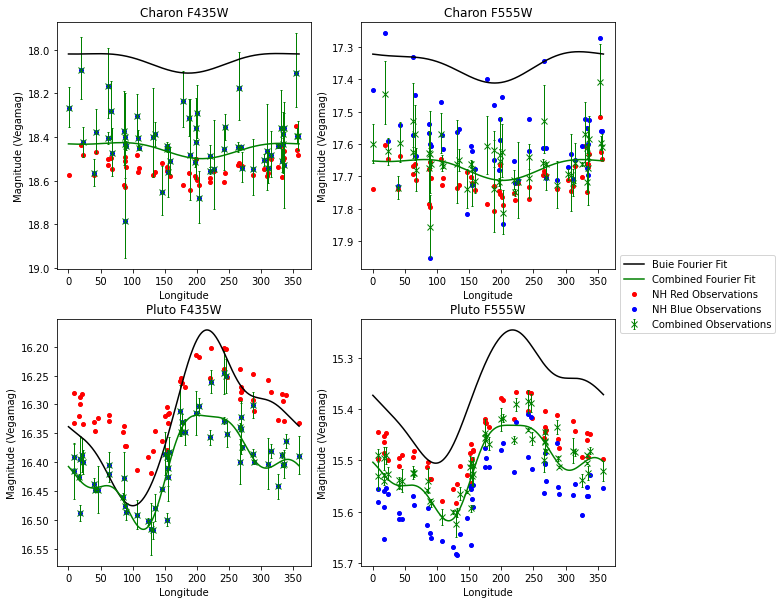

,n,an,bn
0,0,15.407605,0.000000
1,1,0.019621,0.061597
2,2,-0.023422,-0.032527
3,3,0.006143,0.007863
4,4,-0.011263,0.011477


In [19]:
def show_curve(data_file, spec=None):
    target, bandpass = data_file.split("_")
        
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    plt.title(f"{target} {bandpass}")

    
    filename = f"output/{data_file}{f'_{spec}' if spec is not None else ''}.json"
    df = read_file(filename)
    yerr = [df.multi_vegamag_sigma_plus, df.multi_vegamag_sigma_minus]


    plt.errorbar(df.lon, df.multi_vegamag, yerr=yerr, 
                 fmt='x', c='green', elinewidth=1, capsize=1,
                 label='Combined Observations')
    plt.scatter(df.lon, df.converted_vegamag_NH_RED,
                marker='o', s=4**2, c='red',
             label='NH Red Observations')
    plt.scatter(df.lon, df.converted_vegamag_NH_BLUE,
                marker='o', s=4**2, c='blue',
             label='NH Blue Observations')
    
    buie_x = np.arange(360)
    buie_y = get_fourier_fn(f"data/buie_fourier_{data_file}.json")(buie_x)
    plt.plot(buie_x, buie_y, c="black", label="Buie Fourier Fit")
    
    fit_x = np.arange(360)
    fit_y = get_fourier_fn(filename)(fit_x)
    plt.plot(fit_x, fit_y, c="green", label="Combined Fourier Fit")

    plt.xlabel("Longitude")
    plt.ylabel("Magnitude (Vegamag)")
    plt.gca().invert_yaxis()
#     figname = f"{data_file}{f'_{spec}' if spec is not None else ''}.eps"
#     plt.savefig(f"figures/{figname}", bbox_inches='tight')
#     plt.show()

for spec in [None, 'solar', 'pholus']:
    fig, axs = plt.subplots(2, 2)
    targets = ["charon_435", "charon_555", "pluto_435", "pluto_555"]
    for target, ax in zip(targets, axs.flat):
        plt.sca(ax)
        show_curve(target, spec)
    handles, labels = ax.get_legend_handles_labels() # reuses the last ax set inside the for loop
    plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 1.1))
    plt.savefig(f"figures/phase_curves{f'_{spec}' if spec is not None else ''}.eps", bbox_inches='tight')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


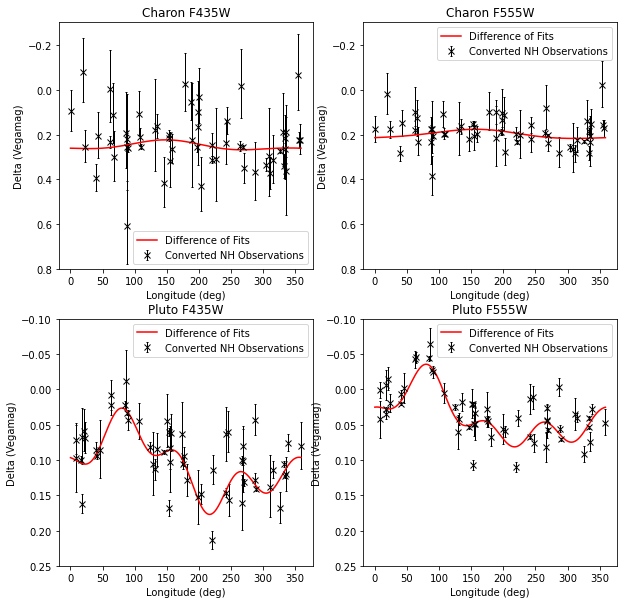

In [5]:
def show_err(data_file):
    target, bandpass = data_file.split("_")
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    plt.title(f"{target} {bandpass}")

    filename = f"output/{data_file}.json"
    df = read_file(filename)
    yerr = [df.multi_vegamag_buie_delta_sigma_plus, df.multi_vegamag_buie_delta_sigma_minus]


    plt.errorbar(df.lon, df.multi_vegamag_buie_delta, yerr=yerr, 
                 fmt='x', c='black', elinewidth=1, capsize=1,
                 label='Converted NH Observations')

    # Fits
    fit_x = np.arange(360)
    buie_y = get_fourier_fn(f"data/buie_fourier_{data_file}.json")(fit_x)
    fit_y = get_fourier_fn(filename)(fit_x)
    plt.plot(fit_x, fit_y-buie_y, c="red", label="Difference of Fits")

    plt.xlabel("Longitude (deg)")
    plt.ylabel("Delta (Vegamag)")
    plt.legend()
    if target == 'Charon':
        plt.gca().set_ylim(-0.3, 0.8)
    else:
        plt.gca().set_ylim(-0.1, 0.25)
    plt.gca().invert_yaxis()
#     figname = data_file + '_buie_delta.jpg'
#     plt.savefig(f"figures/{figname}", bbox_inches='tight')
#     plt.show()

fig, axs = plt.subplots(2, 2)
targets = ["charon_435", "charon_555", "pluto_435", "pluto_555"]
for target, ax in zip(targets, axs.flat):
    plt.sca(ax)
    show_err(target)
plt.savefig(f"figures/phase_curves_diff.eps", bbox_inches='tight')
plt.show()


In [18]:
# Print Fourier values in a table
dfs = {}
for data_name in ["charon_435", "charon_555", "pluto_435", "pluto_555"]:
    filename = f"output/{data_name}.json"
    with open(filename, 'r') as f:
        file = json.load(f)
        df = pd.DataFrame(file['fourier_coefs'], columns=file['fourier_columns'])
        dfs[data_name] = df
        
for title, df in dfs.items():
    target, bandpass = title.split('_')
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    print(target, bandpass)
    for *_, row in df.iterrows():
        print(f"{int(row.n)} & {row.an:.4e} & {row.bn:.4e} \\\\")
    
    

Charon F435W
0 & 1.8300e+01 & 0.0000e+00 \\
1 & -2.8970e-02 & -1.6230e-02 \\
2 & 9.0757e-03 & 1.1610e-02 \\
Charon F555W
0 & 1.7553e+01 & 0.0000e+00 \\
1 & -2.6720e-02 & -1.0727e-02 \\
2 & 9.6830e-03 & 9.4750e-03 \\
Pluto F435W
0 & 1.6433e+01 & 0.0000e+00 \\
1 & 2.6231e-02 & 6.4800e-02 \\
2 & -2.3863e-02 & -3.2837e-02 \\
3 & 1.0814e-02 & 6.6211e-03 \\
4 & -1.0462e-02 & 1.2996e-02 \\
Pluto F555W
0 & 1.5408e+01 & 0.0000e+00 \\
1 & 1.9621e-02 & 6.1597e-02 \\
2 & -2.3422e-02 & -3.2527e-02 \\
3 & 6.1433e-03 & 7.8626e-03 \\
4 & -1.1263e-02 & 1.1477e-02 \\
